## Структура asyncio

В книге приводится условная структура asyncio.

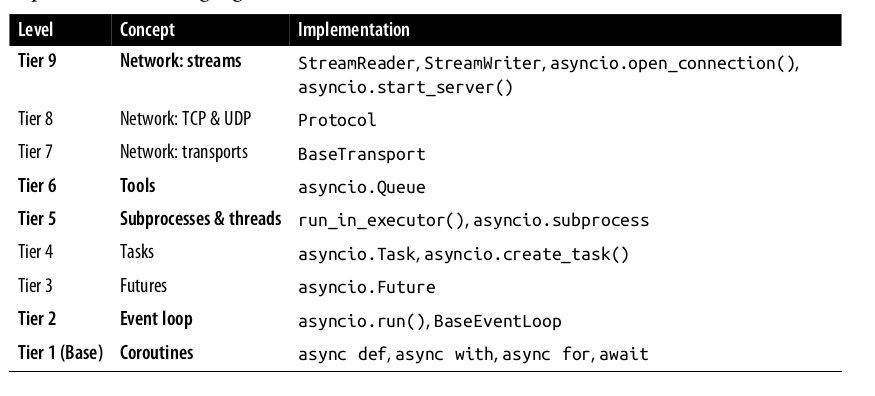

1. На самом фундаментальном уровне, Уровне 1, у нас есть сопрограммы, которые вы уже видели ранее в этой книге. Это самый низкий уровень, на котором можно начать думать о разработке стороннего фреймворка, и, что удивительно, он оказался довольно популярным не в одной, а в двух асинхронных фреймворках, доступных в настоящее время в дикой природе: Curio и Trio. Оба они полагаются только на собственные сопрограммы в Python и ни на что из модуля библиотеки asyncio.

2. Следующий уровень - это цикл событий. Сами по себе сопрограммы бесполезны: они ничего не сделают без цикла, в котором их можно запустить (поэтому Curio и Trio обязательно реализуют свои собственные циклы событий). asyncio предоставляет как спецификацию цикла, AbstractEventLoop, так и реализацию BaseEventLoop.

3. Четкое разделение между спецификацией и реализацией позволяет сторонним разработчикам создавать альтернативные реализации цикла событий, и это уже произошло с проектом uvloop, который обеспечивает гораздо более быструю реализацию цикла, чем в модуле стандартной библиотеки asyncio. . Важно отметить, что
uvloop просто «подключается» к иерархии и заменяет только петлевую часть стека. Именно возможность делать такой выбор - вот почему asyncio API был разработан таким образом, с четким разделением движущихся частей.

4. Уровни 3 и 4 приносят нам будущее и задачи, которые очень тесно связаны; они разделены только потому, что Task является подклассом Future, но их легко можно считать находящимися на одном уровне. Экземпляр Future представляет собой какое-то текущее действие, которое вернет результат через уведомление в цикле событий, в то время как Task представляет собой сопрограмму, выполняющуюся в цикле событий. Краткая версия такова: будущее «знает о петлях», в то время как задача одновременно «знает о петлях» и «сопрограмм». Как разработчик конечного пользователя, вы будете работать с задачами гораздо больше, чем с фьючерсами, но для разработчика фреймворка пропорция может быть другой, в зависимости от деталей.

5. Уровень 5 представляет средства для запуска и ожидания работы, которая должна выполняться в отдельном потоке или даже в отдельном процессе.

6. Уровень 6 представляет дополнительные инструменты с поддержкой асинхронизации, такие как asyncio.Queue. Я мог бы разместить этот уровень после уровней сети, но я думаю, что лучше сначала убрать с пути все API-интерфейсы, поддерживающие сопрограммы, прежде чем мы рассмотрим уровни ввода-вывода. Очередь, предоставляемая asyncio, имеет очень похожий API на потокобезопасную очередь в модуле очереди, за исключением того, что для версии asyncio требуется ключевое слово await в get () и put (). Вы не можете использовать queue.Queue непосредственно внутри сопрограмм, потому что его get () блокирует основной поток

7. Наконец, у нас есть уровни сетевого ввода-вывода с 7 по 9. Как разработчик конечного пользователя, наиболее удобный API для работы - это API потоков на уровне 9. Я разместил API потоков на самом высоком уровне абстракции в башня. API протоколов, расположенный непосредственно под ним (уровень 8), представляет собой более детализированный API; вы можете использовать уровень протоколов во всех случаях, когда вы можете использовать уровень потоков, но использование потоков будет проще.

Уровни, на которых важно сосредоточиться:

**Уровень 1.** Важно понимать, как писать функции async def и использовать await для вызова и выполнения других сопрограмм.

**Уровень 2.** Важно понимать, как запускать, выключать и взаимодействовать с циклом событий.

**Уровень 5.** Исполнители необходимы для использования блокирующего кода в вашем асинхронном приложении, и в действительности большинство сторонних библиотек еще не асинхронно-совместимы. Хорошим примером этого является ORM-библиотека базы данных SQLAlchemy, для которой в настоящее время нет альтернативы, сопоставимой с функциями asyncio.

**Уровень 6.** Если вам нужно передать данные в одну или несколько долго работающих сопрограмм, лучший способ сделать это - использовать asyncio.Queue. Это точно такая же стратегия, как при использовании queue.Queue для распределения данных между потоками. Версия Asyncio Queue использует тот же API, что и модуль очереди стандартной библиотеки, но использует сопрограммы вместо методов блокировки, таких как get().

**Уровень 9.** API потоков дает вам простейший способ управления обменом данными через сокеты по сети, и именно здесь вы должны начать создавать прототипы идей для сетевых приложений. Вы можете обнаружить, что требуется более детальный контроль, и тогда вы можете переключиться на API протоколов, но в большинстве проектов обычно лучше не усложнять задачу, пока вы точно не узнаете, какую проблему пытаетесь решить.